In [ ]:
"""
 Predicted total return for 2025: 143,542

Predicted:  8,811,802
Actual:     7,152,080
Difference: -1,659,722
Percentage: 81.16%

regression model
Train incrementally using data windows
Train on 1985–1994 → test on 1995 ✅
Train on 1985–1995 → test on 1996 ✅
Train on 1985–1996 → test on 1997 ✅
...
Train on 1985–2022 → test on 2023 ✅
Train on 1985–2023 → test on 2024 ✅
Then predict 2025 ✅


Models:
#>>> Random Forest Regressor

Neural Network (NN)
XGBoost Regressor
Linear Regression


Time-Series Cross-Validation Strategy
sklearn.model_selection.TimeSeriesSplit


1 get more features and update the final dataset: Combined_FeatureSet_For_Model
2 split the data by system not river (well have 3 at the end)
3 see the correlation for each dataset (3)
4 choose the features and drop unnecessary columns, label couold be "total retuned next year"
"""

'\n Predicted total return for 2025: 143,542\n\nregression model\nTrain incrementally using data windows\nTrain on 1985–1994 → test on 1995 ✅\nTrain on 1985–1995 → test on 1996 ✅\nTrain on 1985–1996 → test on 1997 ✅\n...\nTrain on 1985–2022 → test on 2023 ✅\nTrain on 1985–2023 → test on 2024 ✅\nThen predict 2025 ✅\n\n\nModels:\n#>>> Random Forest Regressor\n\nNeural Network (NN)\nXGBoost Regressor\nLinear Regression\n\n\nTime-Series Cross-Validation Strategy\n    sklearn.model_selection.TimeSeriesSplit\n\n\n1 get more features and update the final dataset: Combined_FeatureSet_For_Model\n2 split the data by system not river (well have 3 at the end)\n3 see the correlation for each dataset (3)\n4 choose the features and drop unnecessary columns, label couold be "total retuned\xa0next\xa0year"\n'

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset with ReturnYear + ReturnCount
df = pd.read_csv('Cleaned_2Columbia_Return.csv')  #
df.columns = df.columns.str.strip()  # remove extra spaces

In [4]:
df

,ReturnYear,TotalAge,ReturnCount
0,1985,2.0,1461
1,1985,3.0,151004
2,1985,4.0,13875
3,1985,5.0,0
4,1985,6.0,0
...,...,...,...
195,2024,2.0,11687
196,2024,3.0,715817
197,2024,4.0,28205
198,2024,5.0,200


In [5]:
per_year = df.groupby('ReturnYear')['ReturnCount'].sum().reset_index()
per_year = per_year.sort_values('ReturnYear', ascending=False)
print(per_year)


    ReturnYear  ReturnCount
39        2024       755909
38        2023       327548
37        2022       663254
36        2021       151765
35        2020       341740
34        2019        63046
33        2018       193738
32        2017        87694
31        2016       342498
30        2015       510706
29        2014       614176
28        2013       185506
27        2012       515497
26        2011       185796
25        2010       386524
24        2009       177823
23        2008       213608
22        2007        24377
21        2006        37066
20        2005        72822
19        2004       123290
18        2003        37376
17        2002        49419
16        2001       114934
15        2000        93398
14        1999        17876
13        1998        13219
12        1997        47009
11        1996        30233
10        1995         8732
9         1994        12677
8         1993        80177
7         1992        84992
6         1991        76481
5         1990      

In [6]:
total_sum = df[['ReturnCount']].sum()

# Print with commas and no scientific notation
print(f"Predicted:  {total_sum['ReturnCount']:,.0f}")

Predicted:  7,153,541


In [7]:
# Use only relevant columns
df = df[['ReturnYear', 'ReturnCount']].copy()

# Encode year numerically if needed
df['Year'] = df['ReturnYear']  # you can scale/normalize if you want

results = []
rmse_list = []
years_rmse = []

# Walk-forward from very beginning
#this start after oner year of data
for i in range(1, len(df)-1):
    train = df.iloc[:i]
    test = df.iloc[i:i+1]

    X_train = train[['Year']]
    y_train = train['ReturnCount']
    X_test = test[['Year']]
    y_test = test['ReturnCount']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)[0]
    actual = y_test.values[0]
    year = test['ReturnYear'].values[0]

    results.append({'Year': year, 'Predicted': pred, 'Actual': actual})
    
    # Track RMSE
    rmse = np.sqrt(mean_squared_error([actual], [pred]))
    rmse_list.append(rmse)
    years_rmse.append(year)

In [8]:
# Create results DataFrame
results_df = pd.DataFrame(results)
results_df['Difference'] = results_df['Actual'] - results_df['Predicted']

In [9]:
results_df['Difference'] = results_df['Actual'] - results_df['Predicted']

In [10]:
results_df

,Year,Predicted,Actual,Difference
0,1985,1461.000000,151004,149543.000000
1,1985,73241.640000,13875,-59366.640000
2,1985,52166.146667,0,-52166.146667
3,1985,38323.945000,0,-38323.945000
4,1986,34045.510000,24062,-9983.510000
...,...,...,...,...
193,2023,89520.424348,0,-89520.424348
194,2024,70005.992428,11687,-58318.992428
195,2024,32702.942649,715817,683114.057351
196,2024,345490.991976,28205,-317285.991976


In [13]:
total_sum = results_df[['Predicted', 'Actual', 'Difference']].sum()

# Print with commas and no scientific notation
print(f"Predicted:  {total_sum['Predicted']:,.0f}")
print(f"Actual:     {total_sum['Actual']:,.0f}")
print(f"Difference: {total_sum['Difference']:,.0f}")
print("Percentage:", f"{(total_sum['Actual'] / total_sum['Predicted']) * 100:.2f}%")


Predicted:  8,811,802
Actual:     7,152,080
Difference: -1,659,722
Percentage: 81.16%


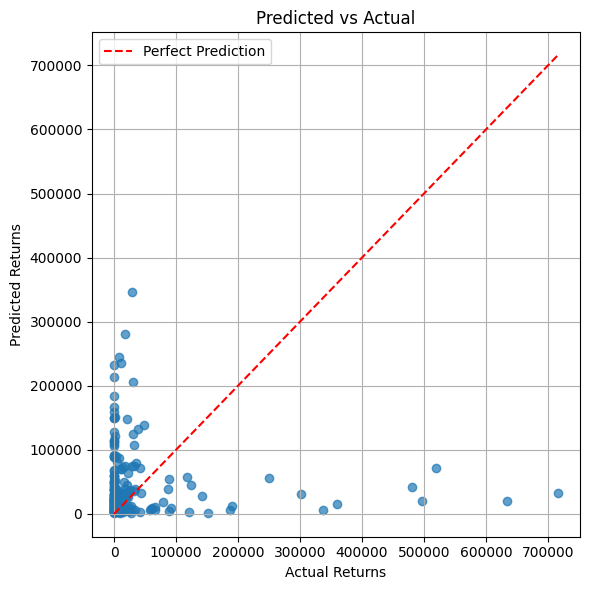

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.7)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


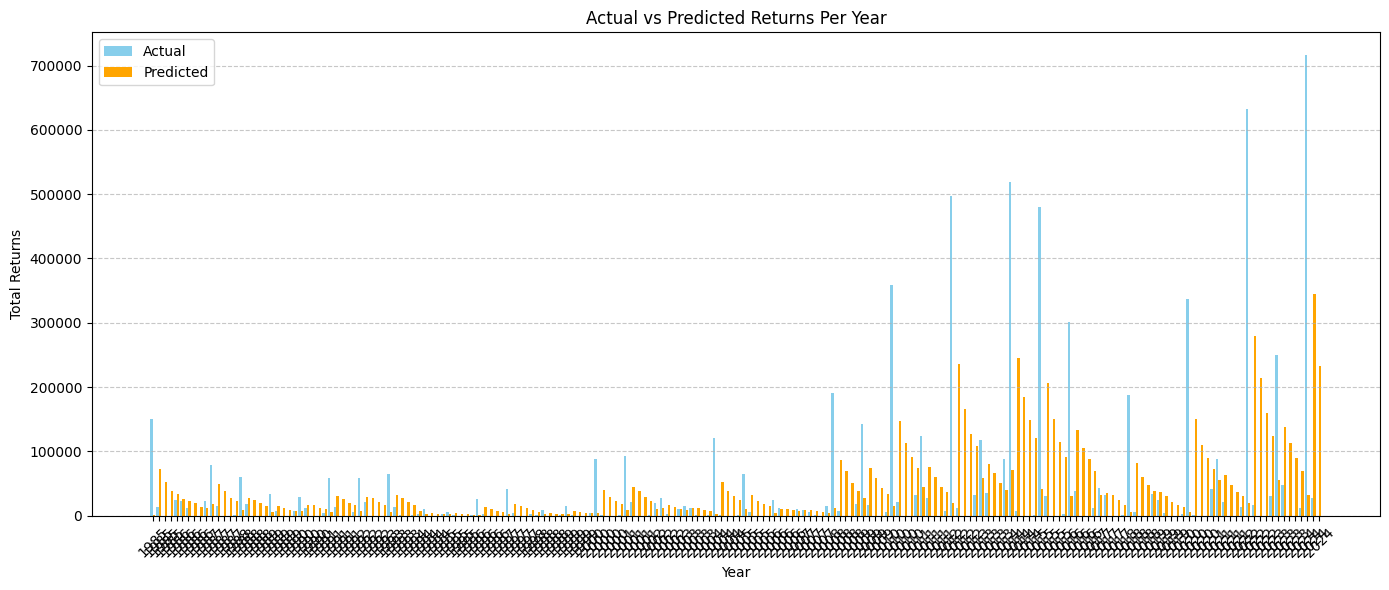

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
years = results_df['Year']
actuals = results_df['Actual']
predictions = results_df['Predicted']

x = np.arange(len(years))  # positions on X-axis
width = 0.4  # bar width

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, actuals, width, label='Actual', color='skyblue')
plt.bar(x + width/2, predictions, width, label='Predicted', color='orange')

# Formatting
plt.xlabel('Year')
plt.ylabel('Total Returns')
plt.title('Actual vs Predicted Returns Per Year')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
# Final train to predict 2025
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(df[['Year']], df['ReturnCount'])
pred_2025 = final_model.predict([[2025]])[0]

print(f"\n📌 Predicted total return for 2025: {int(pred_2025):,}")


📌 Predicted total return for 2025: 143,542


c:\Users\MuriloFarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
